In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from utils import data_generator

IMAGE_FOLDER = "val"


image_paths = [IMAGE_FOLDER + "/" + name for name in next(os.walk(IMAGE_FOLDER))[2]]
gen = data_generator(image_paths)

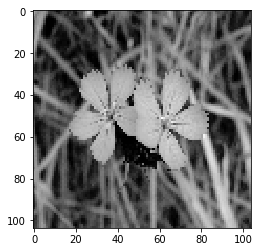

In [2]:
# LAUNCH THIS BLOCK TO TRY OUT THE DATA GENERATOR
feature, labels = next(gen)
plt.imshow(feature, cmap="gray")

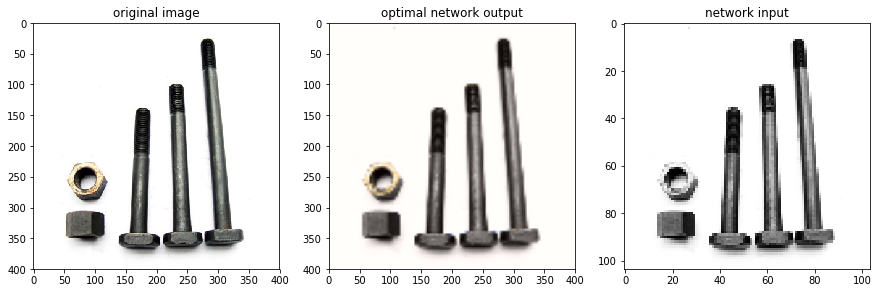

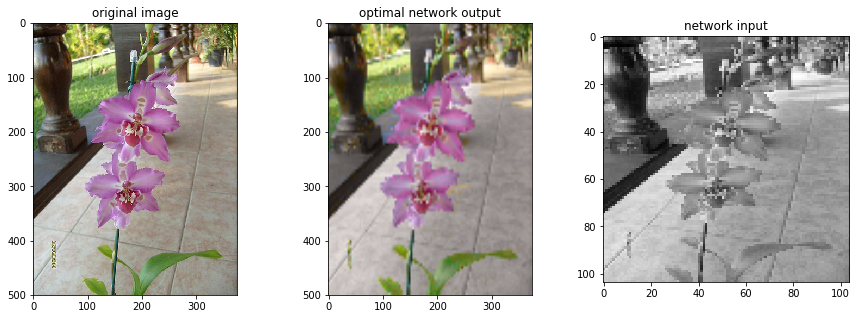

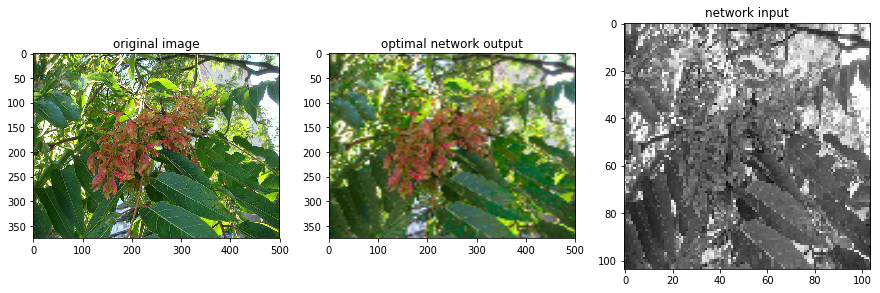

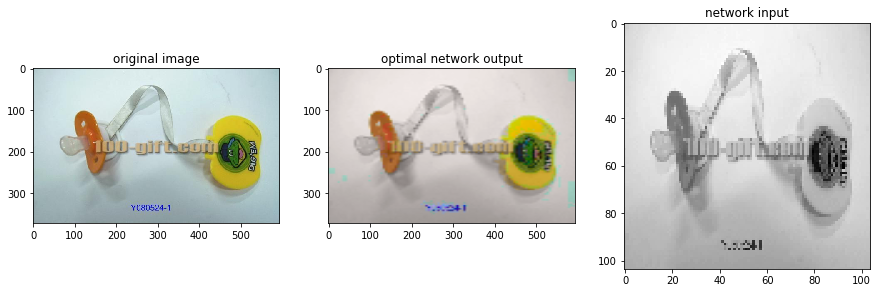

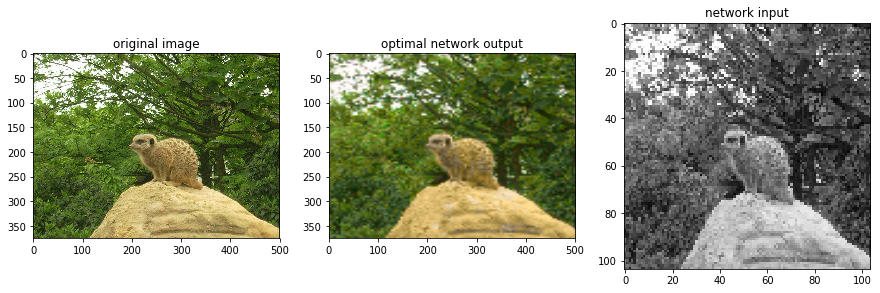

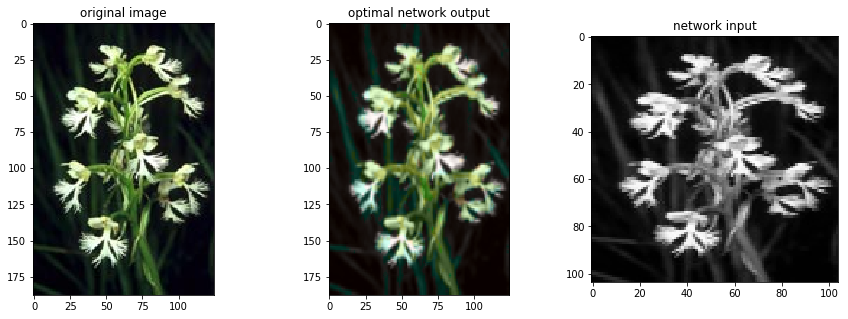

In [23]:
# LAUNCH THIS BLOCK TO VISUALIZE THE PRE PROCESS
from utils import pre_process, process_output

def plot_visualization(image):
    """
    Function to visualize the best output we could have from
    a perfect a model, given the information lost in the pre-process.
    (especially the resizing makes us lose a lot of details)
    """
    features, labels = pre_process(image)
    output = process_output(features, labels, np.shape(image))
    
    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.title("original image")
    
    plt.subplot(1, 3, 2)
    plt.imshow(output)
    plt.title("optimal network output")
    
    plt.subplot(1, 3, 3)
    plt.imshow(features, cmap="gray")
    plt.title("network input")


list_names = np.random.choice(next(os.walk(IMAGE_FOLDER))[2], 6, replace=False)
for name in list_names:
    bgr_image = cv2.imread(IMAGE_FOLDER + "/" + name)
    rgb_image = bgr_image[:, :, ::-1]
    
    plt.figure(figsize=(15, 5))
    plot_visualization(rgb_image)

In [ ]:
# COPY OF PRE-PROCESS: use this to experiment with input size
from utils import _simple_bin

def pre_process_2(image):
    """
    rgb_image -> features, labels
    """
    resized_image = cv2.resize(image, (104, 104))
    lab_image = cv2.cvtColor(resized_image, cv2.COLOR_RGB2LAB)
    luminance = lab_image[:, :, 0]
    ab_channels = lab_image[:, :, 1:]
    binned_ab_channels = _simple_bin(ab_channels)

    return luminance, binned_ab_channels


def data_generator_2(image_paths):
    """
    Given a list of image paths, returns a generator
    that goes through all the images (once) and
    pre process them.
    """
    shuffled_paths = np.array(image_paths)
    np.random.shuffle(shuffled_paths)
    for path in shuffled_paths:
        bgr_image = cv2.imread(path)
        rgb_image = bgr_image[:, :, ::-1]
        try:
            yield pre_process_2(rgb_image)
        except cv2.error:
            print("/!\\ CV2 ERROR /!\\")
            
gen = data_generator_2(image_paths)

In [ ]:
# Use this to show pre-process examples from the pre-process defined above
for i in range(5):
    plt.figure(figsize=(15,15))
    for j in range(0, 5):
        features, labels = next(gen)
        plt.subplot(1, 5, j + 1)
        plt.axis('off')
        plt.imshow(features, cmap="gray")